# Quanvolution
Comparing different kernel sizes

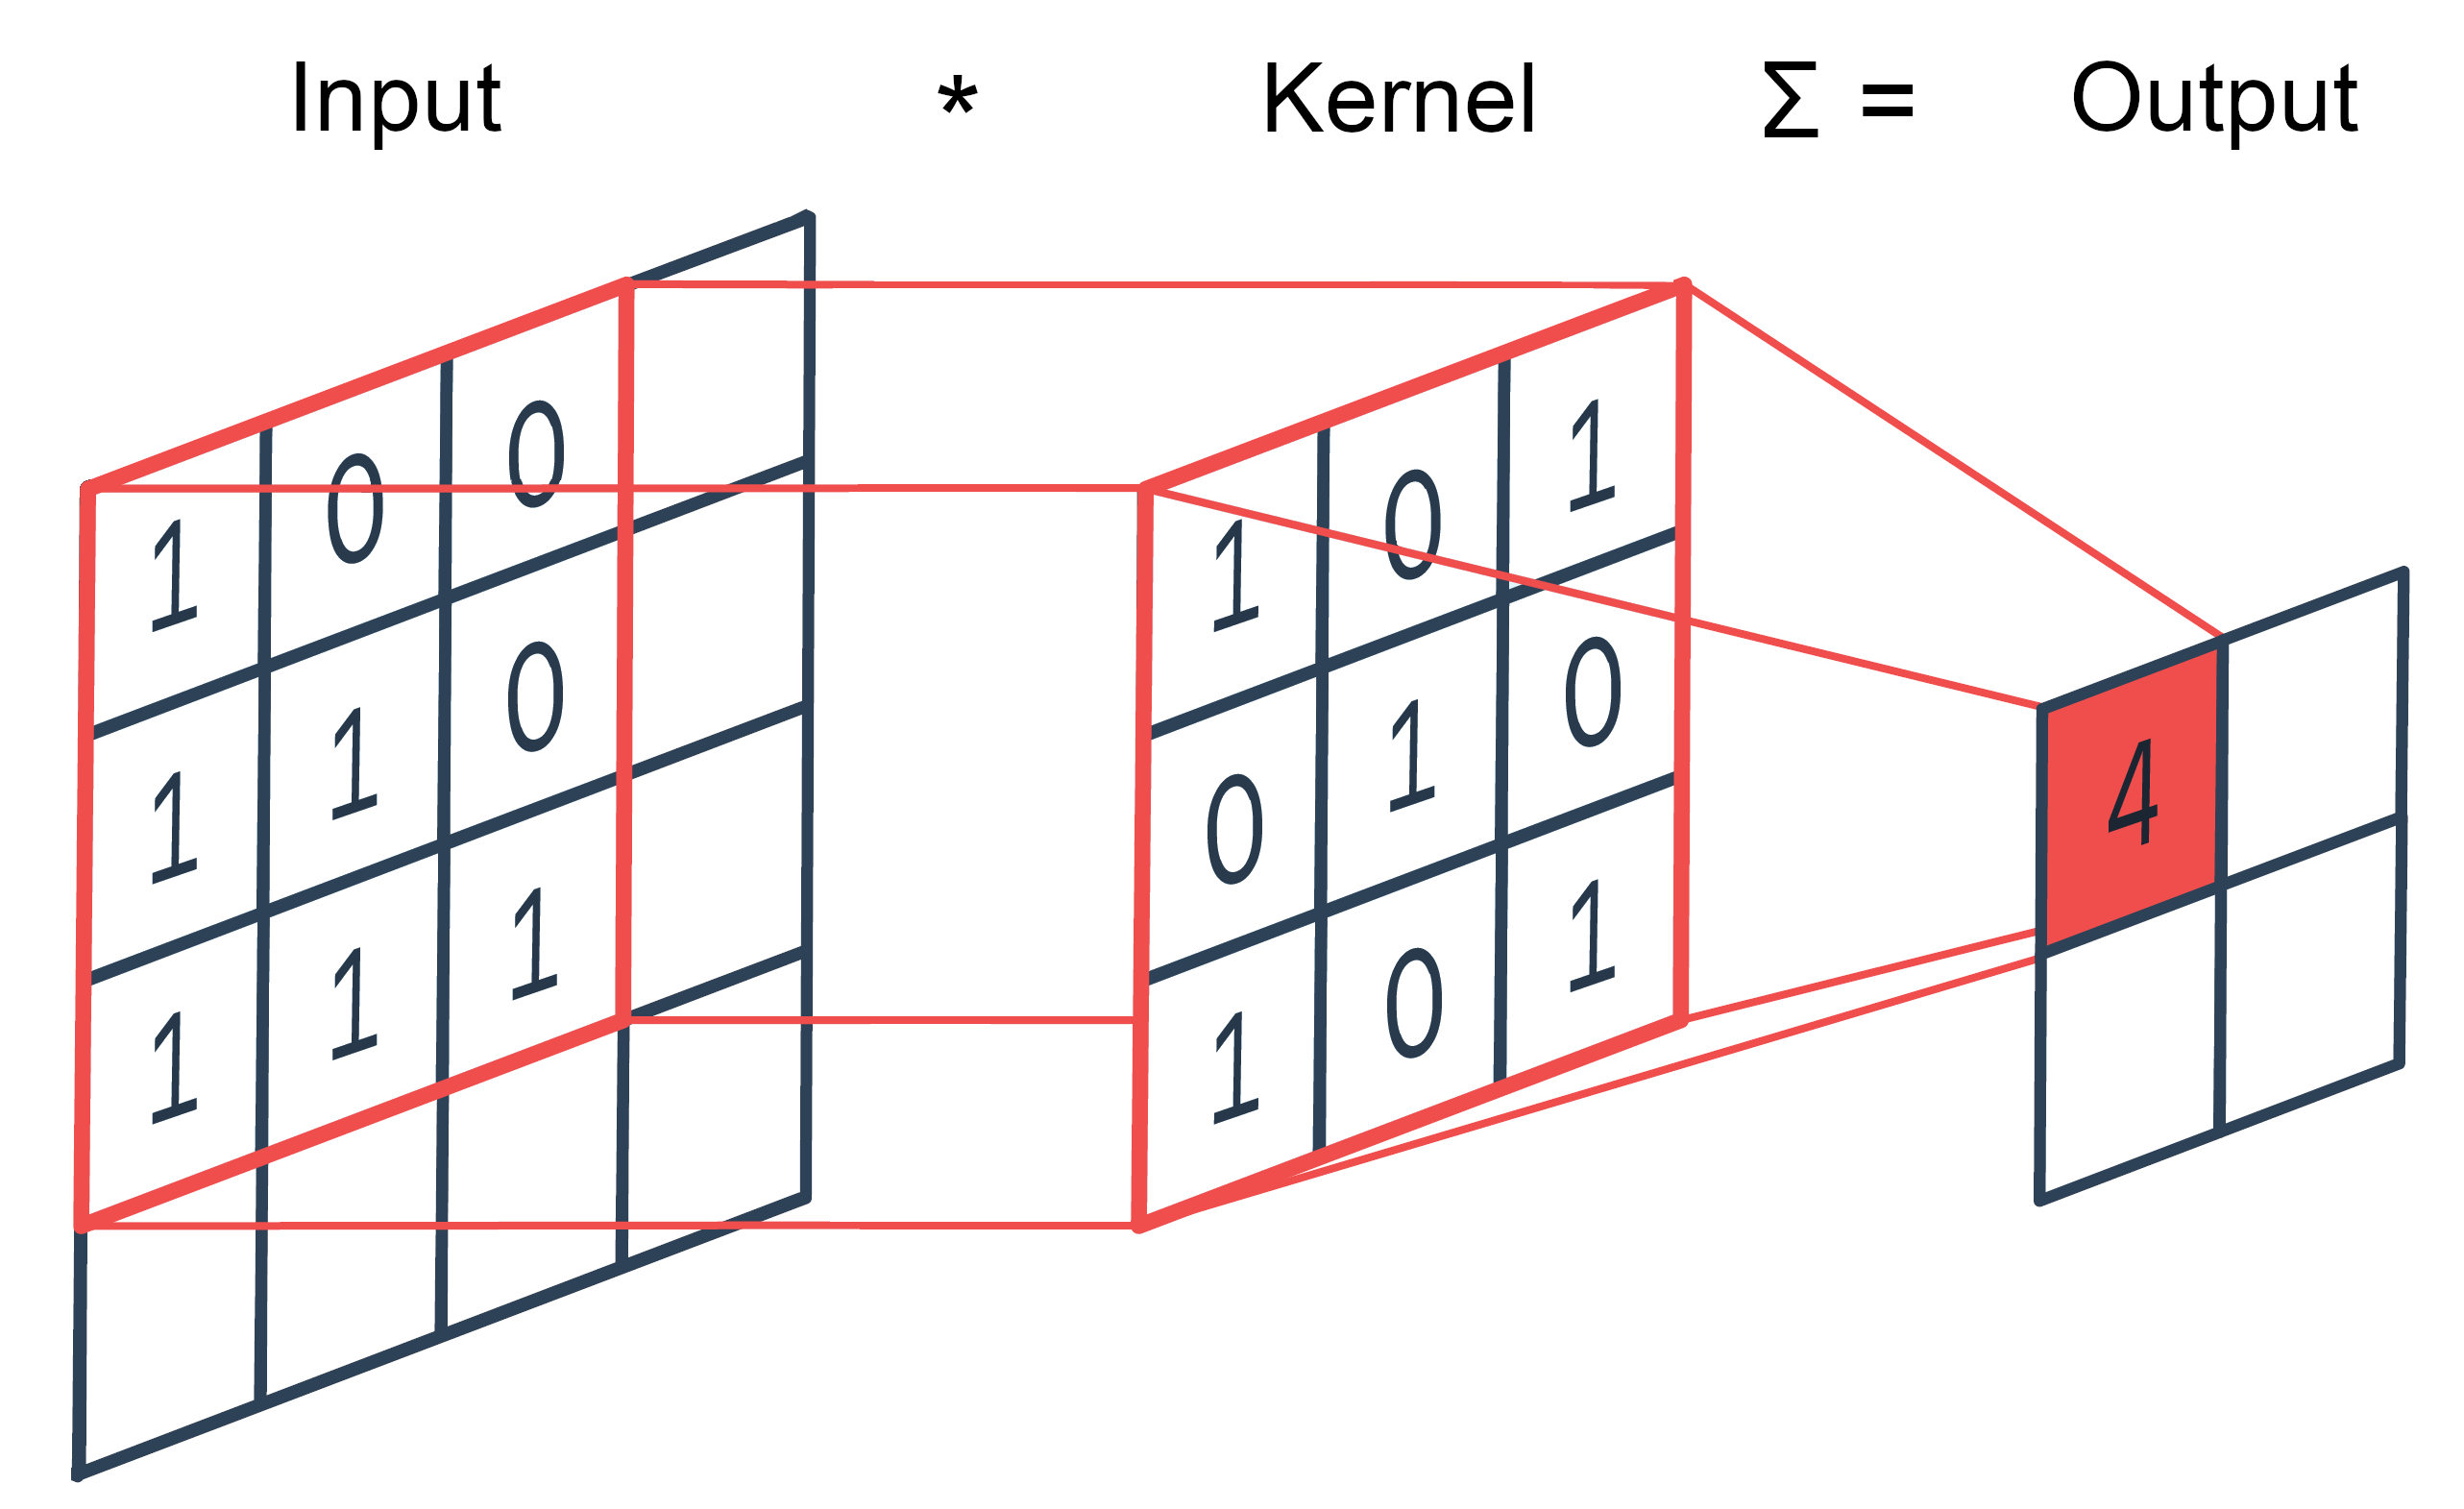

In classical neural networks, a convolution layer is a layer that extracts features from an image using a kernel as shown in the image above. We can perform such operation using quantum circuits called quantum convolution or quanvolution. 

In this notebook we code a new function that allows us to use different kernel sizes in order to compare the validation accuracy between different kernel sizes.

### Importing libraries and functions

In [1]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers

In [2]:
from Utils import get_dataset, quanv, MyModel, prepare_images

### Preparing the training and test dataset

100 images for training and 20 for test

In [3]:
X_train, Y_train, X_test, Y_test = get_dataset(100, 20)

### Preparing the circuit of quanvolution

If we want to use a stride of n then we need an nxn kernel and a circuit of number of qubits = nxn.
For example a stride of 4 means 4x4=16 qubits, and a stride of 2 means 2x2=4 qubits.

(<Figure size 1200x1700 with 1 Axes>, <Axes: >)

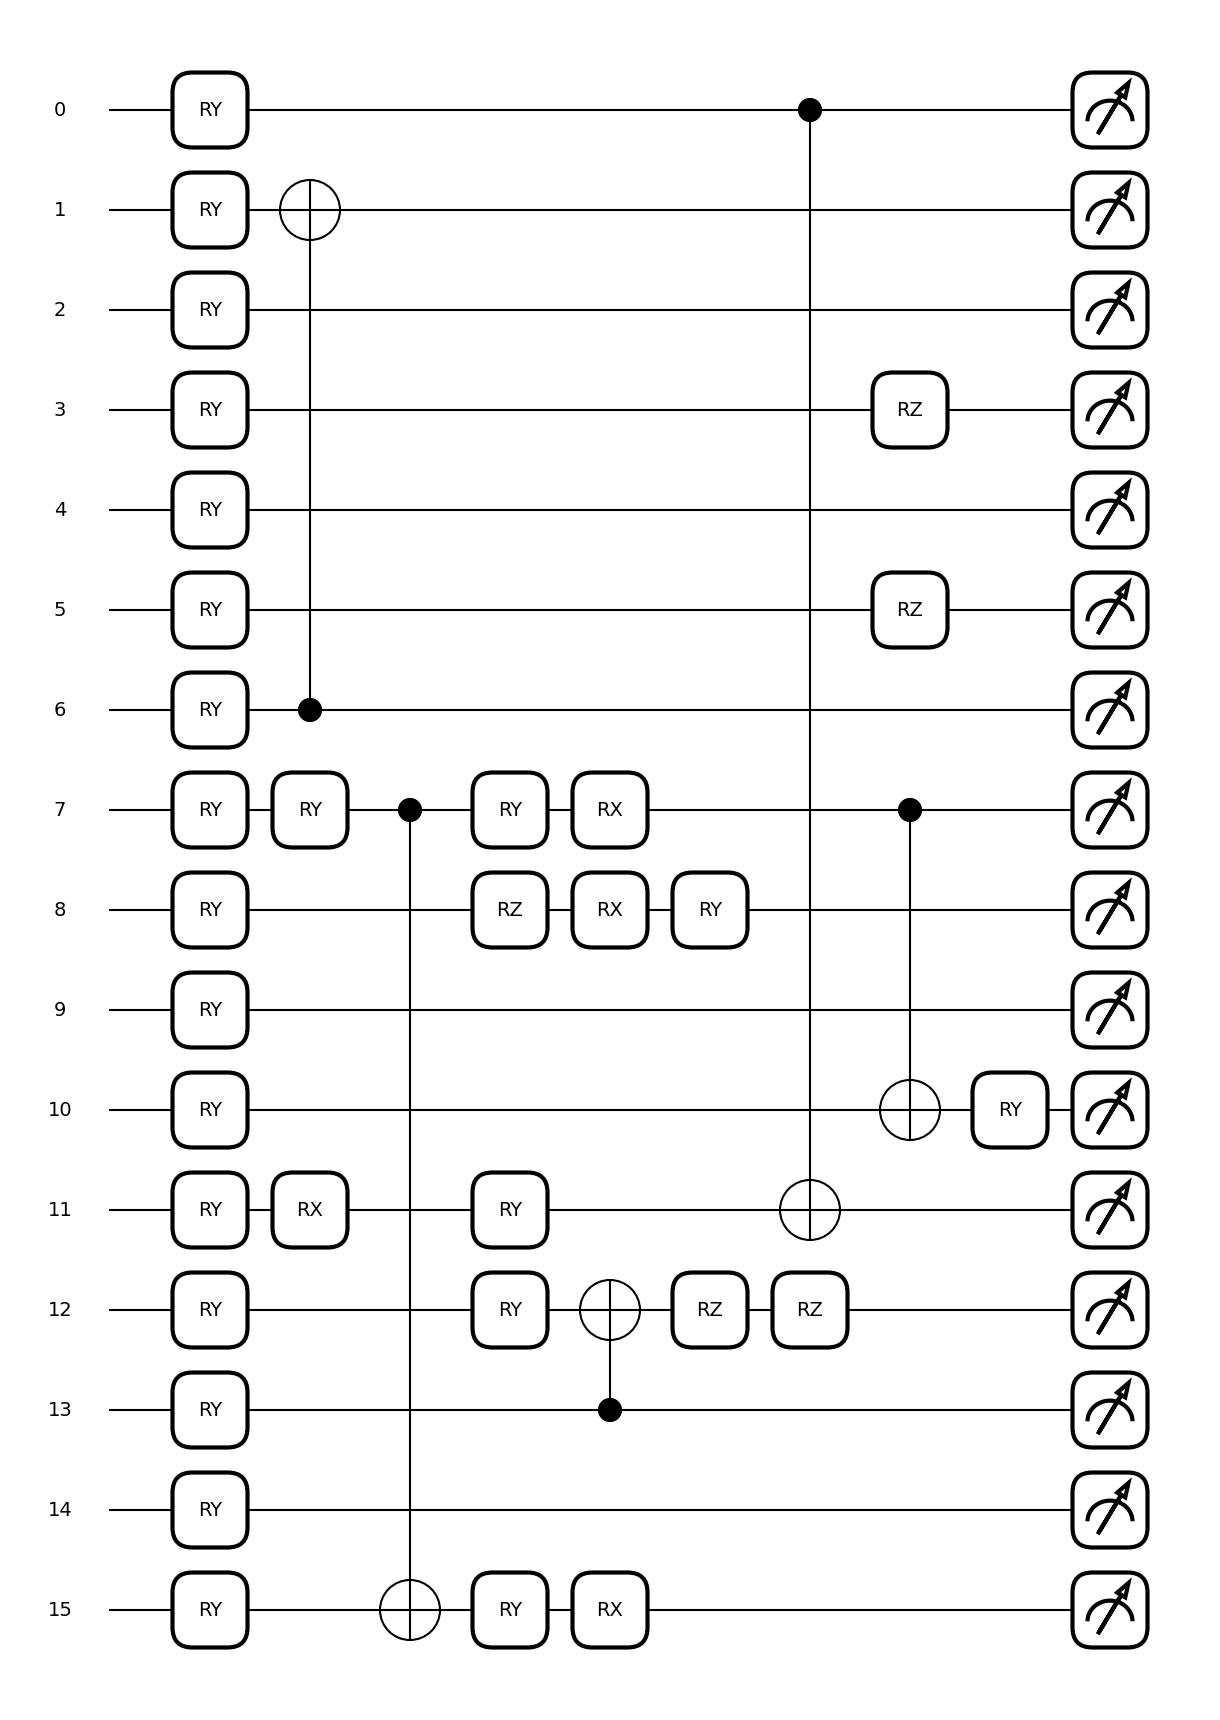

In [4]:
wires = 16
n_layers = 1

dev = qml.device("default.qubit", wires=wires)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, wires))

@qml.qnode(dev)
def circuit(phi):
    # Encoding of 16 classical input values
    for j in range(wires):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(wires)))

    # Measurement producing 16 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(wires)]

qml.draw_mpl(circuit, expansion_strategy="device")(rand_params.reshape((wires, 1)))

Shape of original image

In [5]:
X_train[0].shape

(28, 28, 1)

Shape of image after quantum convolution

In [6]:
quanv(X_train[0], circuit, 4).shape

(7, 7, 16)

### Preparing images using quantum convolution

In [7]:
q_train_images, q_test_images = prepare_images(X_train, X_test, circuit, stride = 4)

Quantum pre-processing of train images:
1/100
2/100
3/100
4/100
5/100
6/100
7/100
8/100
9/100
10/100
11/100
12/100
13/100
14/100
15/100
16/100
17/100
18/100
19/100
20/100
21/100
22/100
23/100
24/100
25/100
26/100
27/100
28/100
29/100
30/100
31/100
32/100
33/100
34/100
35/100
36/100
37/100
38/100
39/100
40/100
41/100
42/100
43/100
44/100
45/100
46/100
47/100
48/100
49/100
50/100
51/100
52/100
53/100
54/100
55/100
56/100
57/100
58/100
59/100
60/100
61/100
62/100
63/100
64/100
65/100
66/100
67/100
68/100
69/100
70/100
71/100
72/100
73/100
74/100
75/100
76/100
77/100
78/100
79/100
80/100
81/100
82/100
83/100
84/100
85/100
86/100
87/100
88/100
89/100
90/100
91/100
92/100
93/100
94/100
95/100
96/100
97/100
98/100
99/100
100/100
Quantum pre-processing of test images:
1/20
2/20
3/20
4/20
5/20
6/20
7/20
8/20
9/20
10/20
11/20
12/20
13/20
14/20
15/20
16/20
17/20
18/20
19/20
20/20


### training the model

In [8]:
# 10 classes, multi-classification.
model = MyModel(10)

history = model.fit(
    q_train_images,
    Y_train,
    validation_data=(q_test_images, Y_test),
    batch_size=4,
    epochs=100,
    verbose=2,
)

Epoch 1/100
25/25 - 5s - 204ms/step - accuracy: 0.1900 - loss: 2.7123 - val_accuracy: 0.3000 - val_loss: 2.2899
Epoch 2/100
25/25 - 0s - 3ms/step - accuracy: 0.5200 - loss: 1.6674 - val_accuracy: 0.4500 - val_loss: 1.7732
Epoch 3/100
25/25 - 0s - 4ms/step - accuracy: 0.7600 - loss: 1.1348 - val_accuracy: 0.6500 - val_loss: 1.4300
Epoch 4/100
25/25 - 0s - 3ms/step - accuracy: 0.8200 - loss: 0.8518 - val_accuracy: 0.6500 - val_loss: 1.3730
Epoch 5/100
25/25 - 0s - 4ms/step - accuracy: 0.9000 - loss: 0.6648 - val_accuracy: 0.6000 - val_loss: 1.2105
Epoch 6/100
25/25 - 0s - 3ms/step - accuracy: 0.9500 - loss: 0.5091 - val_accuracy: 0.6000 - val_loss: 1.2334
Epoch 7/100
25/25 - 0s - 3ms/step - accuracy: 0.9600 - loss: 0.4195 - val_accuracy: 0.7500 - val_loss: 1.0717
Epoch 8/100
25/25 - 0s - 3ms/step - accuracy: 0.9700 - loss: 0.3588 - val_accuracy: 0.7500 - val_loss: 1.0221
Epoch 9/100
25/25 - 0s - 3ms/step - accuracy: 0.9700 - loss: 0.2917 - val_accuracy: 0.6000 - val_loss: 1.1738
Epoch 10

### Example 2 using kernel=2x2

(<Figure size 800x500 with 1 Axes>, <Axes: >)

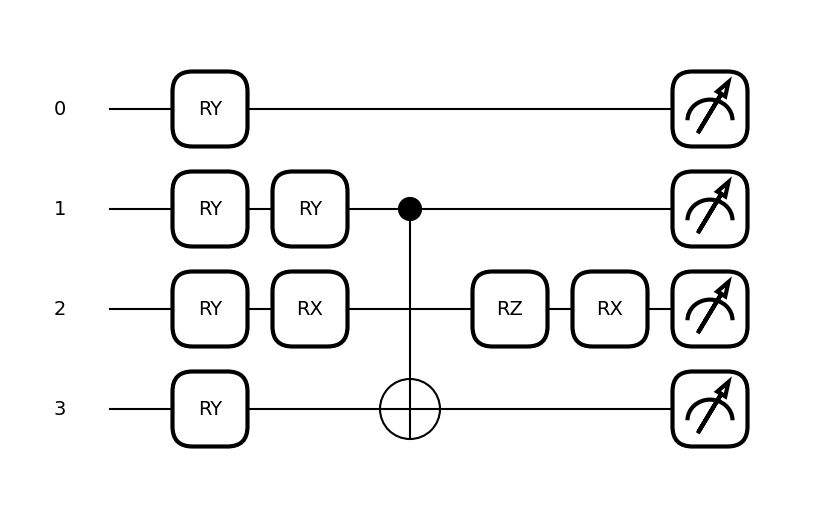

In [9]:
wires = 4
n_layers = 1

dev = qml.device("default.qubit", wires=wires)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, wires))

@qml.qnode(dev)
def circuit(phi):
    # Encoding of 4 classical input values
    for j in range(wires):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(wires)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(wires)]

qml.draw_mpl(circuit, expansion_strategy="device")(rand_params.reshape((wires, 1)))

In [10]:
X_train[0].shape

(28, 28, 1)

In [11]:
quanv(X_train[0], circuit, 2).shape

(14, 14, 4)

In [12]:
q_train_images, q_test_images = prepare_images(X_train, X_test, circuit, stride = 2)

Quantum pre-processing of train images:
1/100
2/100
3/100
4/100
5/100
6/100
7/100
8/100
9/100
10/100
11/100
12/100
13/100
14/100
15/100
16/100
17/100
18/100
19/100
20/100
21/100
22/100
23/100
24/100
25/100
26/100
27/100
28/100
29/100
30/100
31/100
32/100
33/100
34/100
35/100
36/100
37/100
38/100
39/100
40/100
41/100
42/100
43/100
44/100
45/100
46/100
47/100
48/100
49/100
50/100
51/100
52/100
53/100
54/100
55/100
56/100
57/100
58/100
59/100
60/100
61/100
62/100
63/100
64/100
65/100
66/100
67/100
68/100
69/100
70/100
71/100
72/100
73/100
74/100
75/100
76/100
77/100
78/100
79/100
80/100
81/100
82/100
83/100
84/100
85/100
86/100
87/100
88/100
89/100
90/100
91/100
92/100
93/100
94/100
95/100
96/100
97/100
98/100
99/100
100/100
Quantum pre-processing of test images:
1/20
2/20
3/20
4/20
5/20
6/20
7/20
8/20
9/20
10/20
11/20
12/20
13/20
14/20
15/20
16/20
17/20
18/20
19/20
20/20


In [13]:
model2 = MyModel(10)

history2 = model2.fit(
    q_train_images,
    Y_train,
    validation_data=(q_test_images, Y_test),
    batch_size=4,
    epochs=100,
    verbose=2,
)

Epoch 1/100
25/25 - 1s - 33ms/step - accuracy: 0.1800 - loss: 2.5057 - val_accuracy: 0.4500 - val_loss: 1.8513
Epoch 2/100
25/25 - 0s - 4ms/step - accuracy: 0.5700 - loss: 1.5667 - val_accuracy: 0.6500 - val_loss: 1.5649
Epoch 3/100
25/25 - 0s - 3ms/step - accuracy: 0.6300 - loss: 1.1283 - val_accuracy: 0.6500 - val_loss: 1.3042
Epoch 4/100
25/25 - 0s - 3ms/step - accuracy: 0.8300 - loss: 0.7870 - val_accuracy: 0.7000 - val_loss: 1.2315
Epoch 5/100
25/25 - 0s - 3ms/step - accuracy: 0.8700 - loss: 0.6246 - val_accuracy: 0.7000 - val_loss: 1.0855
Epoch 6/100
25/25 - 0s - 3ms/step - accuracy: 0.9500 - loss: 0.4882 - val_accuracy: 0.6500 - val_loss: 1.0970
Epoch 7/100
25/25 - 0s - 13ms/step - accuracy: 0.9400 - loss: 0.3820 - val_accuracy: 0.6500 - val_loss: 1.0648
Epoch 8/100
25/25 - 0s - 3ms/step - accuracy: 0.9800 - loss: 0.3103 - val_accuracy: 0.6500 - val_loss: 1.0188
Epoch 9/100
25/25 - 0s - 3ms/step - accuracy: 0.9700 - loss: 0.2643 - val_accuracy: 0.7000 - val_loss: 0.9162
Epoch 10

### Comparing the validation accuracy

stride=2 vs stride=4 validation accuracy comparison

Text(0.5, 1.0, 'Validation accuracy for 2 cases 4x4 vs 2x2 quanvolution kernel')

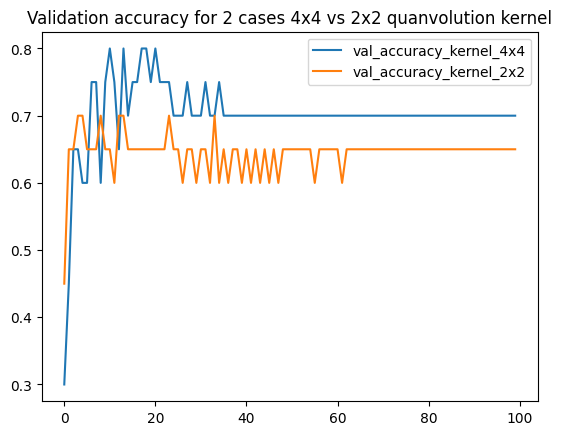

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history["val_accuracy"])
plt.plot(history2.history["val_accuracy"])
plt.legend(['val_accuracy_kernel_4x4', 'val_accuracy_kernel_2x2'])
plt.title("Validation accuracy for 2 cases 4x4 vs 2x2 quanvolution kernel")

### Conclusion

The kernel of size 4x4 gave using this dataset a higher validation accuraacy, this shows the importance of trying different kernel sizes to get the best accuracy possible. 